In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import scipy.cluster as cluster
import dill

In [6]:
# Convenient pickle wrappers
def load_pickle(filename):
    return dill.load(open(file=filename,mode='rb'))
        
def dump_pickle(obj,filename):
    return dill.dump(obj=obj,file=open(file=filename, mode='wb'))

In [7]:
combined_df_metadata = load_pickle("../results/permuted_smcabc_res/sim_2_particles_df.pkl")

In [8]:
pca_ordination = load_pickle("../results/permuted_smcabc_res/pca_sim_2_ordinarion.pkl")

In [9]:
combined_df_metadata

,O13525_Tm,O13525_Topt,O13525_dCpt,P00044_Tm,P00044_Topt,P00044_dCpt,P00045_Tm,P00045_Topt,P00045_dCpt,P00127_Tm,...,Q99312_Tm,Q99312_Topt,Q99312_dCpt,Q99321_Tm,Q99321_Topt,Q99321_dCpt,r2,period,origin,status
0,324.011517,309.048431,-5654.909736,319.029464,308.854086,-10201.378685,330.722458,307.698713,-7468.083910,327.570522,...,327.900869,281.450285,-10527.477800,320.132607,319.114704,-5236.037702,-1.880626,Prior,permuted_2,original
1,321.029080,314.934472,-9192.951274,323.692282,315.842274,-2281.014899,324.596111,306.145593,-3648.635206,320.925803,...,330.140562,321.104984,-5736.460564,336.874817,328.275269,-5817.956263,-1.838452,Prior,permuted_2,original
2,328.304380,306.416948,-3848.988787,325.911058,320.275483,-6091.764854,330.574330,322.683615,-8903.033654,330.084917,...,324.235621,301.013759,-5159.562098,315.538117,303.693461,-4393.534396,0.000417,Prior,permuted_2,original
3,318.972487,313.553418,-8783.217438,323.118882,310.518767,-9418.165899,333.377422,307.626466,-6622.866762,319.969504,...,331.897673,329.009075,-8076.881459,317.165759,295.201913,-3960.006086,-1.865363,Prior,permuted_2,original
4,314.107640,306.476583,-8046.820584,317.100521,314.999054,-7061.618580,325.475854,295.012143,-9953.392527,323.031542,...,337.172876,320.986251,-10468.826646,327.992494,326.020952,-7353.055026,-2.120193,Prior,permuted_2,original
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126034,329.378427,300.429293,-4592.545636,321.975100,311.724877,-5577.046850,325.326136,323.426239,-4866.682909,328.401863,...,328.983914,297.607600,-4548.730594,321.412825,315.491357,-8697.221596,0.236636,Intermediate,permuted_2,replicate
126035,329.560995,300.595351,-4220.519053,326.313627,307.305744,-4758.991685,325.828830,308.851401,-5438.212297,327.793974,...,326.043369,292.285364,-6893.683835,320.496755,311.991598,-7269.427559,0.439627,Intermediate,permuted_2,replicate
126036,325.717623,309.709774,-5102.687419,320.803998,304.065520,-8080.060490,327.570788,315.496163,-7628.927959,324.465117,...,328.090819,289.897743,-8358.970100,332.939563,315.054955,-7741.832745,0.450210,Intermediate,permuted_2,replicate
126037,335.807413,305.705097,-6761.789001,321.540682,302.733991,-6394.771604,325.400789,301.964771,-5352.199926,330.391871,...,332.256725,295.226466,-6353.072539,329.576908,314.719679,-3153.474930,0.371403,Intermediate,permuted_2,replicate


In [10]:
pca_ordination

(array([[ 0.1194244 ,  9.79349912],
        [ 0.53801079, 12.15417666],
        [-1.18509071,  8.36372297],
        ...,
        [16.55840334, -5.86041698],
        [17.72236098, -6.24408598],
        [14.44050404, -6.09644581]]),
 array([0.06965358, 0.00794562]))

(62952,)
(63087,)


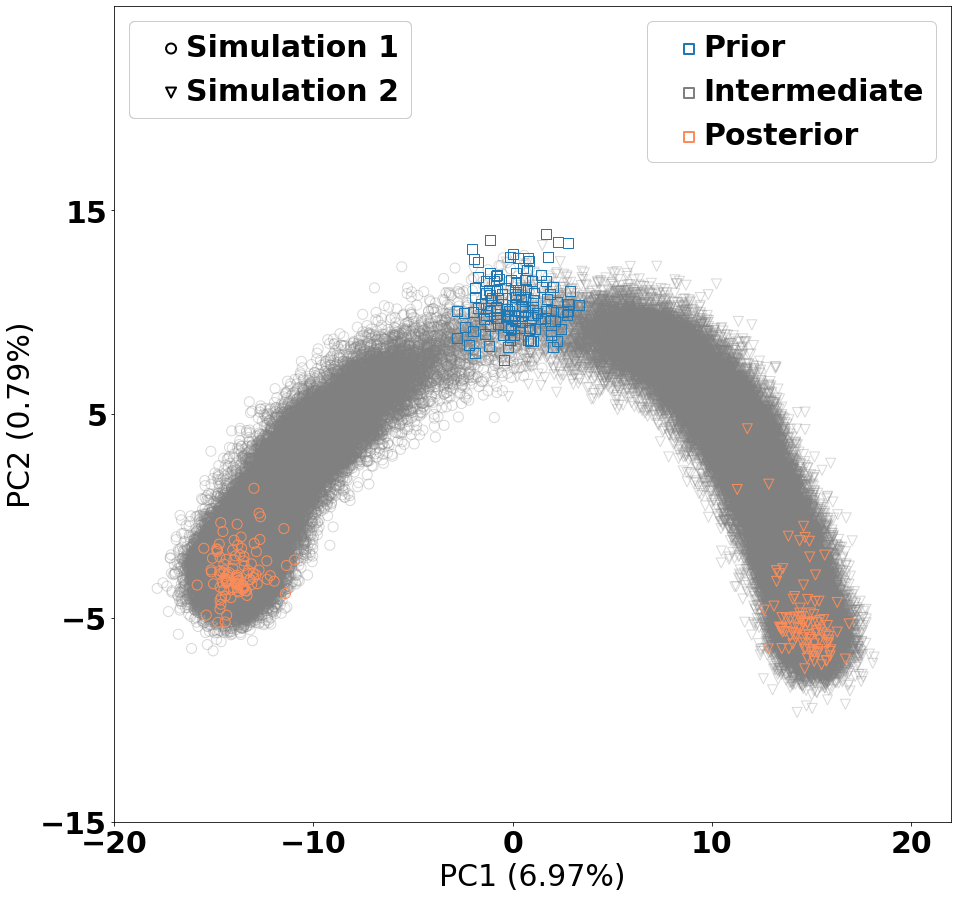

In [20]:
thinning_rng = np.random.default_rng(3052)
plt.figure(figsize=(15,15))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 30}
matplotlib.rc('font', **font)
proper_names = {'unpermuted': "Unpermuted", 'permuted_0': "Permuted 1",
                'permuted_1': "Permuted 2", 'permuted_2': "Permuted 3"}
marker_dict = {'original': 'o', 'replicate': "v"}
all_periods = ["Prior", "Intermediate", 'Posterior']
period = combined_df_metadata["period"].to_numpy()
prior = combined_df_metadata["origin"].to_numpy()
model = combined_df_metadata["status"].to_numpy()
period_idxs = {period_name: np.nonzero(period == period_name)[0] for period_name in all_periods}
PCS, EV = pca_ordination
origin = "permuted_2"
for label in ['original', 'replicate']:
    label_idxs = np.nonzero((model == label) & (prior == origin))[0]
    marker = marker_dict[label]
    this_idxs = {period: np.intersect1d(period_idxs[period], label_idxs) for period in all_periods}
    this_idxs["Intermediate"] = thinning_rng.choice(this_idxs["Intermediate"],size=min(len(this_idxs["Intermediate"]),100000),replace=False)
    this_idxs["Posterior"] = thinning_rng.choice(this_idxs["Posterior"],size=min(len(this_idxs["Posterior"]),100000),replace=False)
    print(label_idxs.shape)
    plt.scatter(PCS[this_idxs["Intermediate"],0],PCS[this_idxs["Intermediate"], 1],
                edgecolors='grey',alpha=0.3,label='Intermediate',marker=marker,facecolors='none',s=100)
    
for label in ['original', 'replicate']:
    label_idxs = np.nonzero((model == label) & (prior == origin))[0]
    marker = marker_dict[label]
    this_idxs = {period: np.intersect1d(period_idxs[period], label_idxs) for period in all_periods}
    this_idxs["Intermediate"] = thinning_rng.choice(this_idxs["Intermediate"],size=100,replace=False)
    this_idxs["Posterior"] = thinning_rng.choice(this_idxs["Posterior"],size=100,replace=False)
    if label=="original":
        plt.scatter(PCS[this_idxs['Prior'],0],PCS[this_idxs['Prior'], 1],edgecolors='#1f78b4',label='Prior',
                    marker="s",facecolors='none',s=100)
    plt.scatter(PCS[this_idxs['Posterior'],0],PCS[this_idxs['Posterior'], 1],
                edgecolors='#fc8d59',label='Posterior',marker=marker, facecolors='none',s=100)
plt.xlabel('PC1 ({:.2f}%)'.format(EV[0]*100))
plt.ylabel('PC2 ({:.2f}%)'.format(EV[1]*100))
plt.xticks(np.arange(-20,22,10))
plt.yticks(np.arange(-15,25,10))
plt.xlim((-20,22))
plt.ylim((-15,25))
# plt.title(proper_names[origin])
# plt.tight_layout()
colors = ['#1f78b4', 'grey', '#fc8d59']
f = lambda m,c: plt.scatter([],[],marker=m,edgecolors=c, facecolors="none", s=100,linewidth=2)
handles_period = [f("s", color) for color in colors]
handles_model = [f(marker, "k") for marker in marker_dict.values()]
legend_period = plt.legend(handles_period, all_periods,loc="upper right", framealpha=1, handletextpad=-.5)
legend_status = plt.legend(handles_model, ["Simulation 1", "Simulation 2"],loc="upper left", framealpha=1,handletextpad=-.5)
plt.gcf().add_artist(legend_period)
plt.gcf().add_artist(legend_status)
plt.savefig("../figures/sim2_pca.png",dpi=300)
plt.show()